In [1]:
pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../Downloads/DailyTemps.csv", parse_dates=["DATE"], index_col = "DATE")
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [21]:
df.shape

(1821, 5)

In [22]:
x = df[["AvgTemp"]]

<AxesSubplot:xlabel='DATE'>

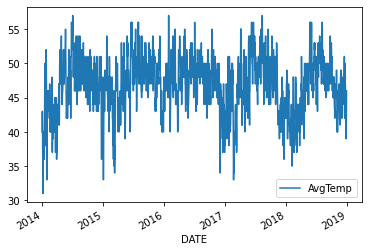

In [23]:
x.plot()

In [24]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(x)
p_val = res[1]
if p_val>0.05:
    print("Not Stationary")
else:
    print("Stationary")

Stationary


In [25]:
from pmdarima import auto_arima

In [26]:
auto_arima = auto_arima(x, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.736, Time=2.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.76 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.90 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.245, Time=2.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.352, Time=2.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=2.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.601, Time=3.11 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.205, Time=3.57 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.533, Time=3.62 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.366, Time=3.30 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [28]:
train_len = int(len(x)*0.8)

In [30]:
train = x.iloc[:train_len]
test = x.iloc[train_len:]
print(train.shape)
print(test.shape)

(1456, 1)
(365, 1)


In [43]:
from statsmodels.tsa.arima_model import ARIMA 
model = ARIMA(train, order = (1, 0, 5))
model_fit = model.fit()
model_fit.summary()

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1456
Model:                     ARMA(1, 5)   Log Likelihood               -3334.671
Method:                       css-mle   S.D. of innovations              2.389
Date:                Fri, 02 Jul 2021   AIC                           6685.343
Time:                        15:16:56   BIC                           6727.610
Sample:                             0   HQIC                          6701.113
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.860     54.100      0.000      44.844      48.215
ar.L1.AvgTemp     0.9844      0.009    112.837      0.000       0.967       1.002
ma.L1.AvgTemp    -0.1312      0.028     -4.704      0.000      -0.186      -0.077
ma.L2.AvgTemp    -0.2444      0.028     -8.853      0.000      -0.299      -0.190
ma.L3.AvgTemp    -0.2051      0.029     -7.029      0.000      -0.262      -0.148
ma.L4.AvgTemp    -0.1476      0.027     -5.486      0.000      -0.200      -0.095
ma.L5.AvgTemp    -0.0584      0.028     -2.082      0.037      -0.113      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0158           +0.0000j            1.0158            0.0000
MA.1            1.0910           -0.0000j            1.0910           -0.0000
MA.2            0.0718           -1.8558j            1.8572           -0.2438
MA.3            0.0718           +1.8558j            1.8572            0.2438
MA.4           -1.8803           -1.0060j            2.1324           -0.4218
MA.5           -1.8803           +1.0060j            2.1324            0.4218
-----------------------------------------------------------------------------
"""

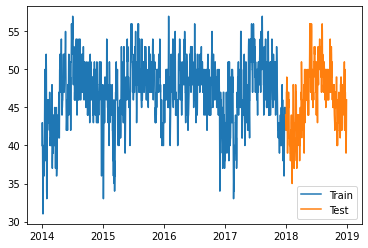

In [44]:
plt.plot(train, label = "Train")
plt.plot(test, label = "Test")
plt.legend()

In [45]:
start = len(train)
end = len(train)+len(test)-1 #OR end = len(x)-1
print(start, end)

1456 1820


In [46]:
ypred_test = model_fit.predict(start = start, end = end)

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [47]:
ypred_test

1456    42.929228
1457    42.907439
1458    43.061198
1459    43.165965
1460    43.203574
          ...    
1816    46.516743
1817    46.516937
1818    46.517129
1819    46.517318
1820    46.517504
Length: 365, dtype: float64

In [51]:
yprd_test = model_fit.predict(start=start, end=end)

C:\Users\sarth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [52]:
ypred_test

1456    42.929228
1457    42.907439
1458    43.061198
1459    43.165965
1460    43.203574
          ...    
1816    46.516743
1817    46.516937
1818    46.517129
1819    46.517318
1820    46.517504
Length: 365, dtype: float64

In [48]:
date_pred = pd.date_range(start = "2017-12-30", end = "2018-12-29")

In [49]:
date_pred

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=365, freq='D')

In [53]:
ypred_test.index = date_pred

In [54]:
ypred_test

2017-12-30    42.929228
2017-12-31    42.907439
2018-01-01    43.061198
2018-01-02    43.165965
2018-01-03    43.203574
                ...    
2018-12-25    46.516743
2018-12-26    46.516937
2018-12-27    46.517129
2018-12-28    46.517318
2018-12-29    46.517504
Freq: D, Length: 365, dtype: float64

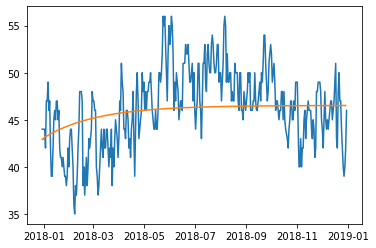

In [55]:
plt.plot(test)
plt.plot(ypred_test)

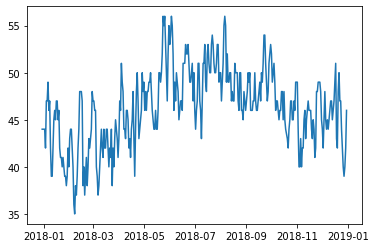

In [41]:
plt.plot(test)


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, ypred_test)
mae = mean_absolute_error(test, ypred_test)
print("MSE is: ", mse)
print("RMSE is", np.sqrt(mse))
print("MAE is", mae)

MSE is:  14.341794320453502
RMSE is 3.7870561549115562
MAE is 3.046680446016533
